In [84]:
# Frequent Patterns: Combinations of Features that occur frequently in the dataset

# Apriori Algorithm
# FP-Growth Algorithm
# We can realize more about relationships between different features

# Steps:
#      Pre-Process, missing values, remove irrelevant
#      Encode Dataset, each row a specific format of accident ( ex binary ) and each columnt a featuer
#      Choose sutable FP-Growth, Apriori Algorithm
#      Setting Minimum Support Threshold: define the minimum occurance
#      Extract Patterns: run algorithm, filter result that support threshold, 
#                      => output: list of frequent itemsets or patterns, combination of features occur frequently
#      Post-Processing, Analysis: analyze extracted patterns, Explore Association Rules
#      Interpret and Visulization


In [85]:
# Frequent Item se in a dataset

# Frequent Itemset = Association Rules
# A frequent itemset = A set of items that occur together frequently in dataset
# Support Count = Number of occurance that set in dataset

# Association Rule Mining Algoirhtms = such as : Apriori, FP-Growth -> output = frequent itemset
# they are iteratively generation algorithm -> output : {left-hand set} -> {candidate set}
# confidence = Number of occurance candidate / Number of occurance left-hand set
# these algorithms work by on-off of an item

# applications: in cross-selling and recommendation systems

# it’s good to put them together in stores or provide some discount offer on 
# one item on purchase of another item


In [86]:
# Defenitions:

# Support = ex 5% support means 5% of all transactions follow this rule
# Support ( A -> B ) = Support ( people who buy A and B ) / Support_count ( All Transactions )

# Confidence ( A -> B ) = Support_count ( A U B ) / Support_count ( A )
# ex Confidence ( A -> B ) = 60% means: 
#     Support_count ( people who buy A and B ) / Support_count ( people who buy A )

# If a rule satisfy both minimum support and minimum confidence its a strong rule


# Support_count ( X ) : Number of transactions that X occur 
# Support_count ( X U Y ) : Number of transactions that X and Y occur
    
# Maximal Itemset : an itemset is maximal if none of its superset are frequent

# Closed Itemset : none of its immediate supersets have same support count same as itemset


# PROS:
#     efficient
#     easy to interpret
#     can be used in wide range of application: finance, healthcare
#     handing large dataset

# CONS:
#     large number of rules
#     limited in detecting complex relationships
#     computationally expensive
#     need to define minimum support and confidence threshold
    


In [87]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
# Load Dataset

abs_path = Path.cwd()
data_address = abs_path.parent.parent / 'data/' / 'Cleaned_US.csv'
df = pd.read_csv(data_address)

In [89]:
# pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [90]:
# One-Shot Encoding on dataset

te = TransactionEncoder()
te

TransactionEncoder()

In [91]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [92]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [93]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support          itemsets
0  0.071072        (Crossing)
1  0.102037        (Junction)
2  0.093829  (Traffic_Signal)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [94]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                    itemsets
0  0.071072                  (Crossing)
1  0.102037                  (Junction)
2  0.024013                   (Station)
3  0.093829            (Traffic_Signal)
4  0.038292  (Crossing, Traffic_Signal)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0        (Crossing)  (Traffic_Signal)            0.071072            0.093829   
1  (Traffic_Signal)        (Crossing)            0.093829            0.071072   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.038292    0.538784  5.742183  0.031624    1.964743       0.889036  
1  0.038292    0.408107  5.742183  0.031624    1.569420       0.911363  


In [95]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                    itemsets
0  0.009834                   (Amenity)
1  0.071072                  (Crossing)
2  0.102037                  (Junction)
3  0.007875                   (Railway)
4  0.024013                   (Station)
5  0.017672                      (Stop)
6  0.093829            (Traffic_Signal)
7  0.007370         (Crossing, Station)
8  0.038292  (Crossing, Traffic_Signal)
9  0.007178   (Station, Traffic_Signal)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0        (Crossing)         (Station)            0.071072            0.024013   
1         (Station)        (Crossing)            0.024013            0.071072   
2        (Crossing)  (Traffic_Signal)            0.071072            0.093829   
3  (Traffic_Signal)        (Crossing)            0.093829            0.071072   
4         (Station)  (Traffic_Signal)            0.024013            0.093829   
5  (Traffic_Signal)         (Statio

In [96]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.003, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                             itemsets
0   0.009834                            (Amenity)
1   0.071072                           (Crossing)
2   0.102037                           (Junction)
3   0.007875                            (Railway)
4   0.024013                            (Station)
5   0.017672                               (Stop)
6   0.093829                     (Traffic_Signal)
7   0.003677                  (Crossing, Amenity)
8   0.003514            (Traffic_Signal, Amenity)
9   0.005302                  (Crossing, Railway)
10  0.007370                  (Crossing, Station)
11  0.004208                     (Stop, Crossing)
12  0.038292           (Crossing, Traffic_Signal)
13  0.007178            (Station, Traffic_Signal)
14  0.003776  (Crossing, Station, Traffic_Signal)

Association Rules:
                   antecedents                 consequents  \
0                   (Crossing)                   (Amenity)   
1                    (Amenity)       

In [97]:
# Abnormaly Acts
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.0005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                      itemsets
0   0.009834                                     (Amenity)
1   0.071072                                    (Crossing)
2   0.002402                                    (Give_Way)
3   0.102037                                    (Junction)
4   0.001524                                     (No_Exit)
5   0.007875                                     (Railway)
6   0.024013                                     (Station)
7   0.017672                                        (Stop)
8   0.000606                             (Traffic_Calming)
9   0.093829                              (Traffic_Signal)
10  0.003677                           (Crossing, Amenity)
11  0.002097                            (Station, Amenity)
12  0.000519                               (Stop, Amenity)
13  0.003514                     (Traffic_Signal, Amenity)
14  0.000845                          (Crossing, Give_Way)
15  0.000989                         

In [98]:
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
3,0.102037,(Junction)
9,0.093829,(Traffic_Signal)
1,0.071072,(Crossing)
20,0.038292,"(Crossing, Traffic_Signal)"
6,0.024013,(Station)
7,0.017672,(Stop)
0,0.009834,(Amenity)
5,0.007875,(Railway)
18,0.007370,"(Crossing, Station)"
27,0.007178,"(Station, Traffic_Signal)"


In [99]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(Crossing),(Traffic_Signal),0.071072,0.093829,0.038292,0.538784,5.742183,0.031624,1.964743,0.889036
19,(Traffic_Signal),(Crossing),0.093829,0.071072,0.038292,0.408107,5.742183,0.031624,1.569420,0.911363
15,(Station),(Crossing),0.024013,0.071072,0.007370,0.306933,4.318628,0.005664,1.340314,0.787352
14,(Crossing),(Station),0.071072,0.024013,0.007370,0.103705,4.318628,0.005664,1.088912,0.827238
29,(Traffic_Signal),(Station),0.093829,0.024013,0.007178,0.076505,3.185928,0.004925,1.056840,0.757164
...,...,...,...,...,...,...,...,...,...,...
80,"(Railway, Traffic_Signal)",(Station),0.002148,0.024013,0.000524,0.243792,10.152326,0.000472,1.290632,0.903441
79,"(Station, Traffic_Signal)",(Railway),0.007178,0.007875,0.000524,0.072953,9.263748,0.000467,1.070199,0.898502
78,"(Station, Railway)",(Traffic_Signal),0.001628,0.093829,0.000524,0.321602,3.427533,0.000371,1.335752,0.709400
5,(Amenity),(Stop),0.009834,0.017672,0.000519,0.052738,2.984268,0.000345,1.037018,0.671513


In [100]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,"(Railway, Traffic_Signal)",(Crossing),0.002148,0.071072,0.001937,0.901510,12.684500,0.001784,9.431707,0.923147
85,"(Crossing, Station, Amenity)",(Traffic_Signal),0.000990,0.093829,0.000705,0.712050,7.588788,0.000612,3.146968,0.869087
48,"(Crossing, Give_Way)",(Traffic_Signal),0.000845,0.093829,0.000593,0.701066,7.471731,0.000513,3.031342,0.866895
13,(Railway),(Crossing),0.007875,0.071072,0.005302,0.673318,9.473775,0.004743,2.843525,0.901545
87,"(Station, Amenity, Traffic_Signal)",(Crossing),0.001100,0.071072,0.000705,0.640891,9.017520,0.000627,2.586760,0.890084
...,...,...,...,...,...,...,...,...,...,...
71,(Crossing),"(Stop, Station)",0.071072,0.000984,0.000565,0.007952,8.081392,0.000495,1.007023,0.943301
96,(Traffic_Signal),"(Crossing, Station, Amenity)",0.093829,0.000990,0.000705,0.007513,7.588788,0.000612,1.006573,0.958127
10,(Crossing),(No_Exit),0.071072,0.001524,0.000530,0.007460,4.895313,0.000422,1.005980,0.856603
53,(Traffic_Signal),"(Crossing, Give_Way)",0.093829,0.000845,0.000593,0.006315,7.471731,0.000513,1.005505,0.955849


In [101]:
# Convert weather float columns to categorical
weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                         'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Define the thresholds for each weather column
thresholds = {
    'Temperature(F)': [0, 32, 70, float('inf')],
    'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
    'Humidity(%)': [0, 40, 70, 100],
    'Pressure(in)': [0, 29.5, 30, float('inf')],
    'Visibility(mi)': [0, 2, 5, float('inf')],
    'Wind_Speed(mph)': [0, 5, 10, float('inf')],
    'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
}

df_static_threshold = pd.DataFrame()

# Discretize and encode weather columns using one-hot encoding
for column in weather_float_columns:
    bins = thresholds[column]
    labels = range(len(bins) - 1)
    categories = pd.cut(df[column], bins=bins, labels=labels)
    encoded_cols = pd.get_dummies(categories, prefix=column)
    df_static_threshold = pd.concat([df_static_threshold, encoded_cols], axis=1)

# Drop the original weather float columns
# df.drop(weather_float_columns, axis=1, inplace=True)

# Temperature: 32, 70


In [102]:
df_static_threshold

,Temperature(F)_0,Temperature(F)_1,Temperature(F)_2,Wind_Chill(F)_0,Wind_Chill(F)_1,Wind_Chill(F)_2,Humidity(%)_0,Humidity(%)_1,Humidity(%)_2,Pressure(in)_0,...,Pressure(in)_2,Visibility(mi)_0,Visibility(mi)_1,Visibility(mi)_2,Wind_Speed(mph)_0,Wind_Speed(mph)_1,Wind_Speed(mph)_2,Precipitation(in)_0,Precipitation(in)_1,Precipitation(in)_2
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2774571,0,1,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2774572,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2774573,0,1,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [103]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df_static_threshold[weather_float_columns], min_support=0.7, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support            itemsets
0  0.753698   (Wind_Chill(F)_2)
1  0.899235  (Visibility(mi)_2)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [104]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df_static_threshold[weather_float_columns], min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                             itemsets
0  0.753698                    (Wind_Chill(F)_2)
1  0.899235                   (Visibility(mi)_2)
2  0.697797  (Visibility(mi)_2, Wind_Chill(F)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   
1   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   
1            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   

   zhangs_metric  
0       0.285085  
1       0.116631  


In [105]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df_static_threshold[weather_float_columns], min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                             itemsets
0  0.562669                   (Temperature(F)_1)
1  0.753698                    (Wind_Chill(F)_2)
2  0.899235                   (Visibility(mi)_2)
3  0.697797  (Visibility(mi)_2, Wind_Chill(F)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   
1   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   
1            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   

   zhangs_metric  
0       0.285085  
1       0.116631  


In [106]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df_static_threshold[weather_float_columns], min_support=0.4, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                              itemsets
0  0.562669                    (Temperature(F)_1)
1  0.753698                     (Wind_Chill(F)_2)
2  0.442223                       (Humidity(%)_2)
3  0.442223                       (Humidity(%)_2)
4  0.899235                    (Visibility(mi)_2)
5  0.421931                   (Wind_Speed(mph)_1)
6  0.495006  (Temperature(F)_1, Visibility(mi)_2)
7  0.697797   (Visibility(mi)_2, Wind_Chill(F)_2)
8  0.442223                       (Humidity(%)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   
1   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   
1            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   

   zhangs_metric  
0       

In [109]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Pressure(in)_1', 'Pressure(in)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df_static_threshold[weather_float_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                           itemsets
0   0.562669                                 (Temperature(F)_1)
1   0.363661                                 (Temperature(F)_2)
2   0.753698                                  (Wind_Chill(F)_2)
3   0.386941                                    (Humidity(%)_1)
4   0.442223                                    (Humidity(%)_2)
5   0.320209                                   (Pressure(in)_0)
6   0.424994                                   (Pressure(in)_1)
7   0.899235                                 (Visibility(mi)_2)
8   0.421931                                (Wind_Speed(mph)_1)
9   0.386371                (Temperature(F)_1, Wind_Chill(F)_2)
10  0.495006               (Temperature(F)_1, Visibility(mi)_2)
11  0.363661                (Wind_Chill(F)_2, Temperature(F)_2)
12  0.351673               (Visibility(mi)_2, Temperature(F)_2)
13  0.308532                   (Humidity(%)_1, Wind_Chill(F)_2)
14  0.347585         

In [110]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
7,0.899235,(Visibility(mi)_2)
2,0.753698,(Wind_Chill(F)_2)
15,0.697797,"(Visibility(mi)_2, Wind_Chill(F)_2)"
0,0.562669,(Temperature(F)_1)
10,0.495006,"(Temperature(F)_1, Visibility(mi)_2)"
4,0.442223,(Humidity(%)_2)
6,0.424994,(Pressure(in)_1)
8,0.421931,(Wind_Speed(mph)_1)
3,0.386941,(Humidity(%)_1)
9,0.386371,"(Temperature(F)_1, Wind_Chill(F)_2)"


In [111]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(Visibility(mi)_2),(Wind_Chill(F)_2),0.899235,0.753698,0.697797,0.775990,1.029576,0.020045,1.099511,0.285085
9,(Wind_Chill(F)_2),(Visibility(mi)_2),0.753698,0.899235,0.697797,0.925831,1.029576,0.020045,1.358587,0.116631
17,(Wind_Speed(mph)_1),(Visibility(mi)_2),0.421931,0.899235,0.383989,0.910074,1.012053,0.004573,1.120524,0.020602
16,(Visibility(mi)_2),(Wind_Speed(mph)_1),0.899235,0.421931,0.383989,0.427017,1.012053,0.004573,1.008875,0.118188
15,(Visibility(mi)_2),(Pressure(in)_1),0.899235,0.424994,0.382559,0.425428,1.001021,0.000390,1.000755,0.010119
14,(Pressure(in)_1),(Visibility(mi)_2),0.424994,0.899235,0.382559,0.900153,1.001021,0.000390,1.009193,0.001773
12,(Humidity(%)_1),(Visibility(mi)_2),0.386941,0.899235,0.380756,0.984015,1.094280,0.032805,6.303857,0.140537
13,(Visibility(mi)_2),(Humidity(%)_1),0.899235,0.386941,0.380756,0.423422,1.094280,0.032805,1.063271,0.855034
0,(Wind_Chill(F)_2),(Temperature(F)_2),0.753698,0.363661,0.363661,0.482502,1.326791,0.089570,1.229645,1.000000
1,(Temperature(F)_2),(Wind_Chill(F)_2),0.363661,0.753698,0.363661,1.000000,1.326791,0.089570,inf,0.387061


## Dynamic Thresholds

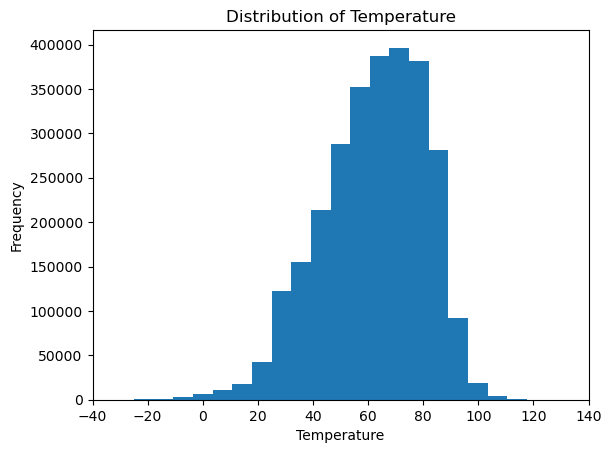

In [154]:
# Analys best cuts for features
# Temperature(F)

temperature_data = df['Temperature(F)']

# Plot distribution
plt.hist(temperature_data, bins=40)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xlim(-40,140)
plt.title('Distribution of Temperature')
plt.savefig('Distribution of Temperature')
# 50, 90


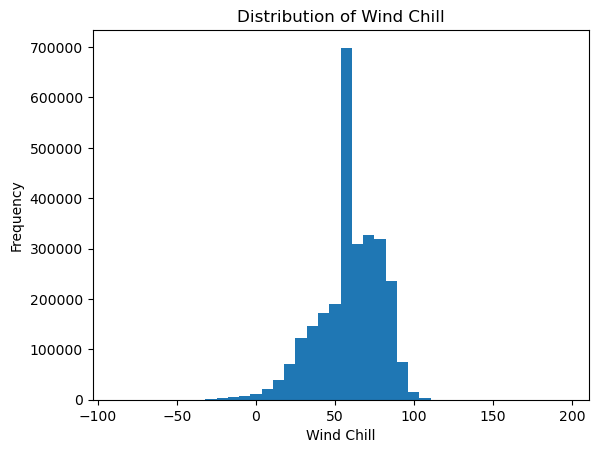

In [155]:
# Analys best cuts for features
# Wind_Chill(F)

wind_chill_data = df['Wind_Chill(F)']

# Plot distribution
plt.hist(wind_chill_data, bins=40)
plt.xlabel('Wind Chill')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Chill')
plt.savefig('Distribution of Wind Chill')

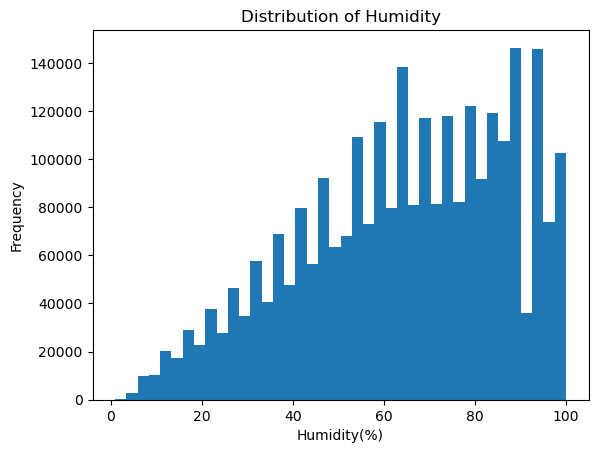

In [156]:
# Analys best cuts for features
# Humidity(%)

humidity_data = df['Humidity(%)']

# Plot distribution
plt.hist(humidity_data, bins=40)
plt.xlabel('Humidity(%)')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')
plt.savefig('Distribution of Humidity')

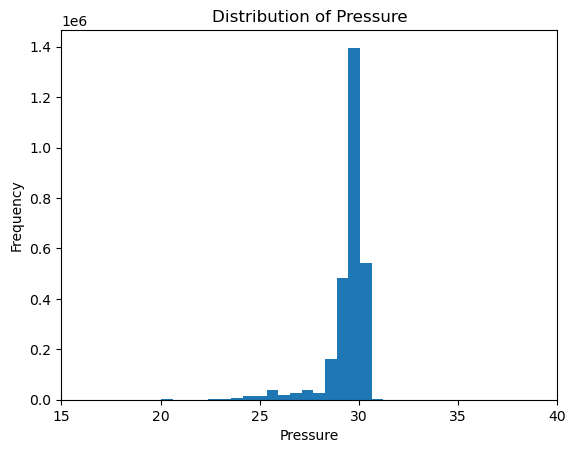

In [157]:
# Analys best cuts for features
# Pressure(in)

pressure_data = df['Pressure(in)']

# Plot distribution
plt.hist(pressure_data, bins=100)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.xlim(15,40)
plt.title('Distribution of Pressure')
plt.savefig('Distribution of Pressure')

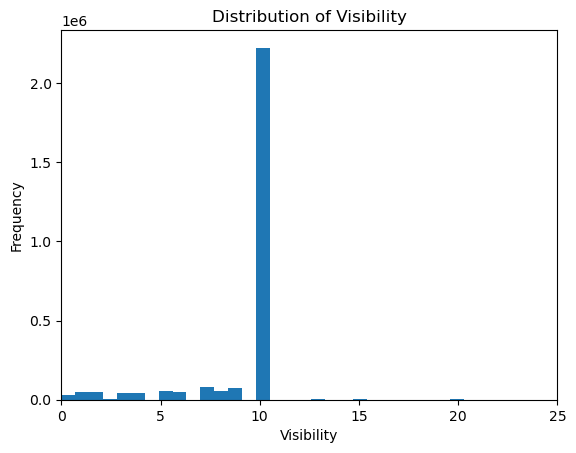

In [158]:
# Analys best cuts for features
# Visibility(mi)

visibility_data = df['Visibility(mi)']

# Plot distribution
plt.hist(visibility_data, bins=200)
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.xlim(0,25)
plt.title('Distribution of Visibility')
plt.savefig('Distribution of Visibility')

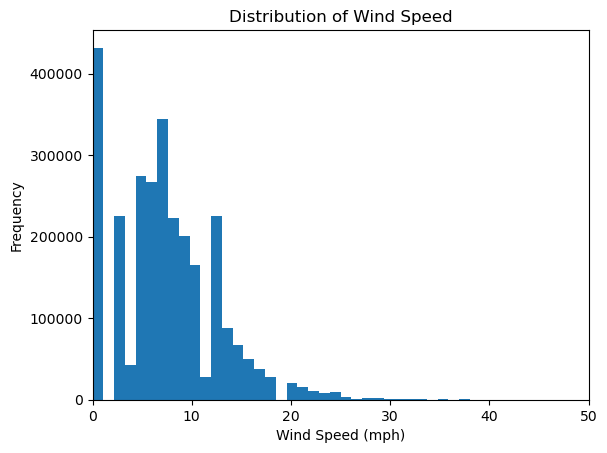

In [137]:
# Analyze best cuts for features
# Wind_Speed(mph)

wind_speed_data = df['Wind_Speed(mph)']

# Plot distribution
plt.hist(wind_speed_data, bins=1000)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.xlim(0,50)
plt.savefig('Wind_Speed_Distribution.png')


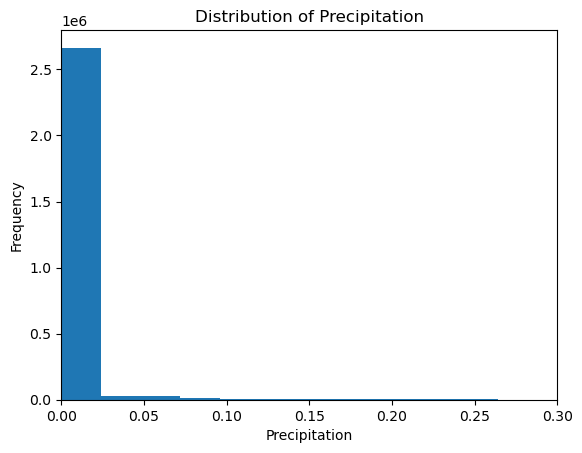

In [138]:
# Analys best cuts for features
# Percipitation(in)

temperature_data = df['Precipitation(in)']

# Plot distribution
plt.hist(temperature_data, bins=1000)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.xlim(0,0.3)
plt.title('Distribution of Precipitation')
plt.savefig('Distribution of Precipitation')

In [139]:
# With new threshold

In [160]:
thresholds = {
    'Temperature(F)': [0, np.percentile(df['Temperature(F)'], 15), np.percentile(df['Temperature(F)'], 85), float('inf')],
    'Wind_Chill(F)': [0, np.percentile(df['Wind_Chill(F)'], 15), np.percentile(df['Wind_Chill(F)'], 85), float('inf')],
    'Humidity(%)': [0, np.percentile(df['Humidity(%)'], 15), np.percentile(df['Humidity(%)'], 85), float('inf')], 
    'Pressure(in)': [0, np.percentile(df['Pressure(in)'], 15), np.percentile(df['Pressure(in)'], 85), float('inf')],
    'Visibility(mi)': [0, np.percentile(df['Visibility(mi)'], 15), np.percentile(df['Visibility(mi)'], 85), float('inf')],
    'Wind_Speed(mph)': [0, np.percentile(df['Wind_Speed(mph)'], 30), np.percentile(df['Wind_Speed(mph)'], 85), float('inf')],
    'Precipitation(in)': [0, np.percentile(df['Precipitation(in)'], 80), np.percentile(df['Precipitation(in)'], 95), float('inf')],
}

thresholds

{'Temperature(F)': [0, 42.0, 81.0, inf],
 'Wind_Chill(F)': [0, 39.0, 79.0, inf],
 'Humidity(%)': [0, 38.0, 89.0, inf],
 'Pressure(in)': [0, 28.98, 30.08, inf],
 'Visibility(mi)': [0, 8.0, 10.0, inf],
 'Wind_Speed(mph)': [0, 5.0, 13.0, inf],
 'Precipitation(in)': [0, 0.0069757601823351, 0.01, inf]}

In [161]:
# Convert weather float columns to categorical
weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                         'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

df_dynamic_threshold = pd.DataFrame()

# Discretize and encode weather columns using one-hot encoding
for column in weather_float_columns:
    bins = thresholds[column]
    labels = range(len(bins) - 1)
    categories = pd.cut(df[column], bins=bins, labels=labels)
    encoded_cols = pd.get_dummies(categories, prefix=column)
    df_dynamic_threshold = pd.concat([df_dynamic_threshold, encoded_cols], axis=1)


In [162]:
df_dynamic_threshold

,Temperature(F)_0,Temperature(F)_1,Temperature(F)_2,Wind_Chill(F)_0,Wind_Chill(F)_1,Wind_Chill(F)_2,Humidity(%)_0,Humidity(%)_1,Humidity(%)_2,Pressure(in)_0,...,Pressure(in)_2,Visibility(mi)_0,Visibility(mi)_1,Visibility(mi)_2,Wind_Speed(mph)_0,Wind_Speed(mph)_1,Wind_Speed(mph)_2,Precipitation(in)_0,Precipitation(in)_1,Precipitation(in)_2
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2774571,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
2774572,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2774573,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [163]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Pressure(in)_1', 'Pressure(in)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']
# Apply Apriori algorithm
frequent_itemsets = apriori(df_dynamic_threshold[weather_float_columns], min_support=0.7, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support            itemsets
0  0.701716  (Temperature(F)_1)
1  0.702920    (Pressure(in)_1)
2  0.828812  (Visibility(mi)_1)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [164]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Pressure(in)_1', 'Pressure(in)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']
# Apply Apriori algorithm
frequent_itemsets = apriori(df_dynamic_threshold[weather_float_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                           itemsets
0   0.701716                                 (Temperature(F)_1)
1   0.698073                                  (Wind_Chill(F)_1)
2   0.696435                                    (Humidity(%)_1)
3   0.702920                                   (Pressure(in)_1)
4   0.828812                                 (Visibility(mi)_1)
5   0.524310                                (Wind_Speed(mph)_1)
6   0.658469                (Temperature(F)_1, Wind_Chill(F)_1)
7   0.487270                  (Temperature(F)_1, Humidity(%)_1)
8   0.509059                 (Temperature(F)_1, Pressure(in)_1)
9   0.583292               (Visibility(mi)_1, Temperature(F)_1)
10  0.357661              (Temperature(F)_1, Wind_Speed(mph)_1)
11  0.479901                   (Wind_Chill(F)_1, Humidity(%)_1)
12  0.505597                  (Pressure(in)_1, Wind_Chill(F)_1)
13  0.578428                (Visibility(mi)_1, Wind_Chill(F)_1)
14  0.356565         

In [165]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
4,0.828812,(Visibility(mi)_1)
3,0.702920,(Pressure(in)_1)
0,0.701716,(Temperature(F)_1)
1,0.698073,(Wind_Chill(F)_1)
2,0.696435,(Humidity(%)_1)
6,0.658469,"(Temperature(F)_1, Wind_Chill(F)_1)"
16,0.613945,"(Visibility(mi)_1, Humidity(%)_1)"
9,0.583292,"(Visibility(mi)_1, Temperature(F)_1)"
18,0.581449,"(Visibility(mi)_1, Pressure(in)_1)"
13,0.578428,"(Visibility(mi)_1, Wind_Chill(F)_1)"


In [166]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Temperature(F)_1),(Wind_Chill(F)_1),0.701716,0.698073,0.658469,0.938369,1.344227,0.168619,4.898922,0.858506
1,(Wind_Chill(F)_1),(Temperature(F)_1),0.698073,0.701716,0.658469,0.943266,1.344227,0.168619,5.257608,0.848146
10,(Visibility(mi)_1),(Humidity(%)_1),0.828812,0.696435,0.613945,0.740753,1.063634,0.036731,1.170946,0.349484
11,(Humidity(%)_1),(Visibility(mi)_1),0.696435,0.828812,0.613945,0.881553,1.063634,0.036731,1.445272,0.197083
4,(Visibility(mi)_1),(Temperature(F)_1),0.828812,0.701716,0.583292,0.703768,1.002924,0.001701,1.006926,0.017031
...,...,...,...,...,...,...,...,...,...,...
138,"(Visibility(mi)_1, Wind_Chill(F)_1, Pressure(i...",(Humidity(%)_1),0.412849,0.696435,0.307593,0.745050,1.069805,0.020071,1.190684,0.111130
53,(Visibility(mi)_1),"(Temperature(F)_1, Wind_Speed(mph)_1)",0.828812,0.357661,0.304971,0.367961,1.028801,0.008538,1.016298,0.163532
52,"(Temperature(F)_1, Wind_Speed(mph)_1)",(Visibility(mi)_1),0.357661,0.828812,0.304971,0.852683,1.028801,0.008538,1.162035,0.043582
66,"(Wind_Chill(F)_1, Wind_Speed(mph)_1)",(Visibility(mi)_1),0.356565,0.828812,0.303034,0.849869,1.025406,0.007508,1.140256,0.038507


In [168]:
df_dynamic_threshold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774575 entries, 0 to 2774574
Data columns (total 21 columns):
 #   Column               Dtype
---  ------               -----
 0   Temperature(F)_0     uint8
 1   Temperature(F)_1     uint8
 2   Temperature(F)_2     uint8
 3   Wind_Chill(F)_0      uint8
 4   Wind_Chill(F)_1      uint8
 5   Wind_Chill(F)_2      uint8
 6   Humidity(%)_0        uint8
 7   Humidity(%)_1        uint8
 8   Humidity(%)_2        uint8
 9   Pressure(in)_0       uint8
 10  Pressure(in)_1       uint8
 11  Pressure(in)_2       uint8
 12  Visibility(mi)_0     uint8
 13  Visibility(mi)_1     uint8
 14  Visibility(mi)_2     uint8
 15  Wind_Speed(mph)_0    uint8
 16  Wind_Speed(mph)_1    uint8
 17  Wind_Speed(mph)_2    uint8
 18  Precipitation(in)_0  uint8
 19  Precipitation(in)_1  uint8
 20  Precipitation(in)_2  uint8
dtypes: uint8(21)
memory usage: 55.6 MB


/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

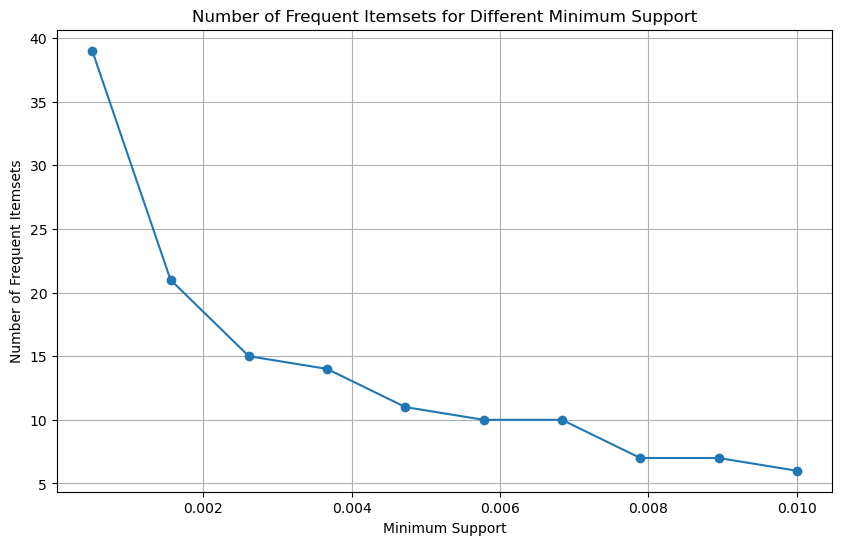

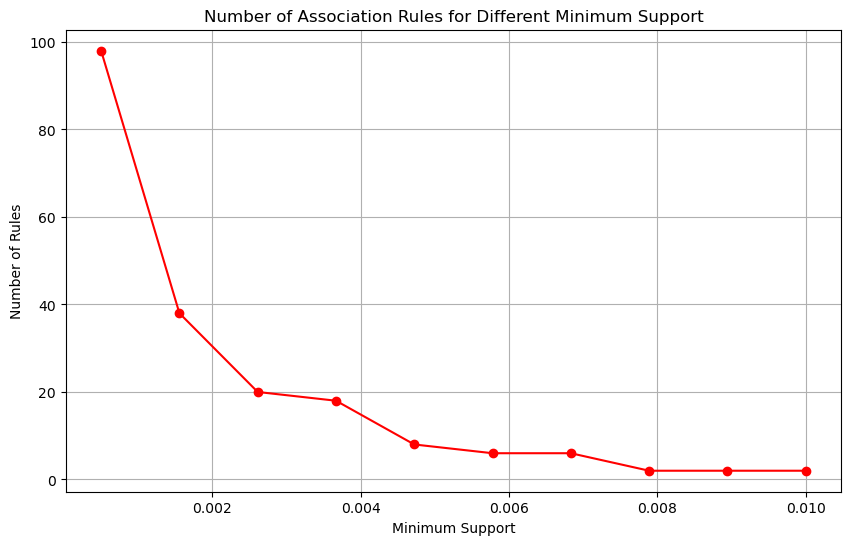

In [167]:
# Generate the minimum support values
min_support_values = np.linspace(0.0005, 0.01, num=10)

# Reverse the order of minimum support values
min_support_values = min_support_values[::-1]

num_frequent_itemsets = []
num_rules = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df[bool_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets.append(len(frequent_itemsets))
    num_rules.append(len(rules))
    
# Plot number of frequent itemsets
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_frequent_itemsets, marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets for Different Minimum Support')
plt.grid(True)
plt.savefig('frequent_itemsets_plot_traffic_sign.png')
plt.show()


# Plot number of rules
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_rules, marker='o', color='r')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Association Rules for Different Minimum Support')
plt.grid(True)
plt.savefig('rules_count_plot_traffic_sign.png')
plt.show()



/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

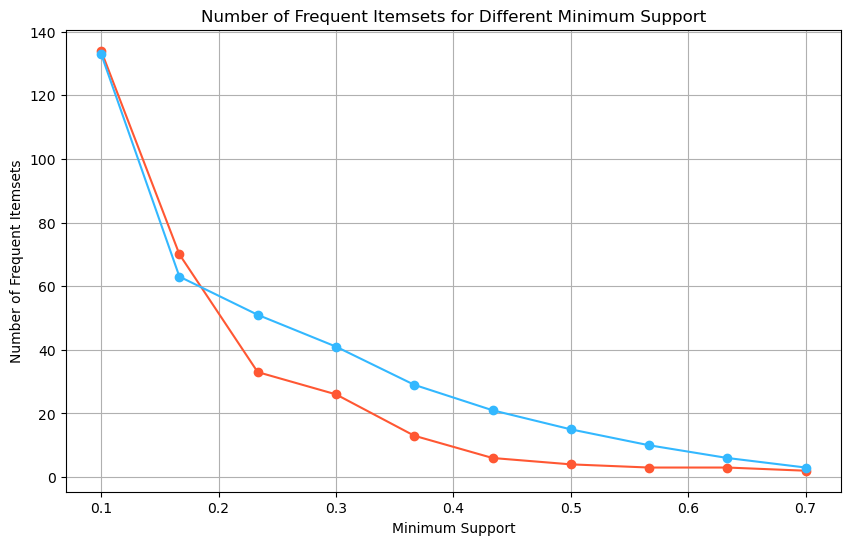

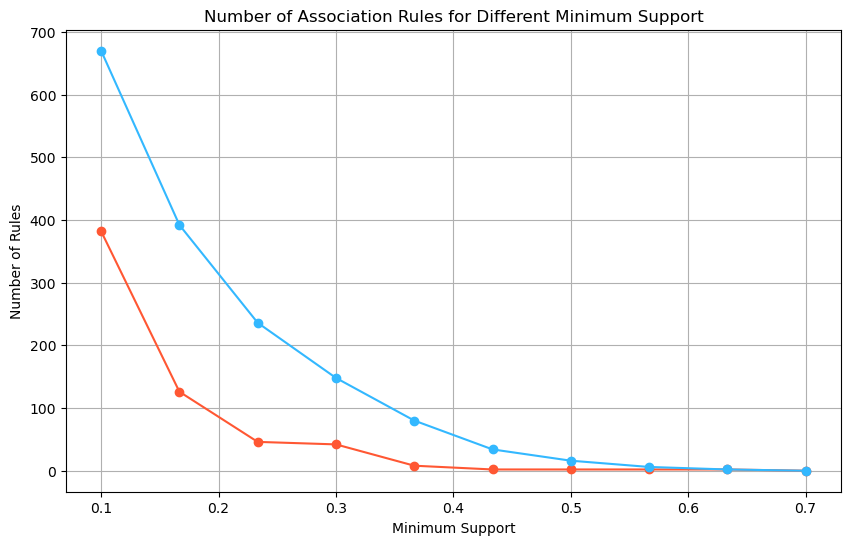

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the minimum support values
min_support_values = np.linspace(0.1, 0.7, num=10)

# Reverse the order of minimum support values
min_support_values = min_support_values[::-1]

num_frequent_itemsets_static = []
num_rules_static = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df_static_threshold[weather_float_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets_static.append(len(frequent_itemsets))
    num_rules_static.append(len(rules))
    
    
num_frequent_itemsets_dynamic = []
num_rules_dynamic = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df_dynamic_threshold[weather_float_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets_dynamic.append(len(frequent_itemsets))
    num_rules_dynamic.append(len(rules))
    
    
# Define colors for static and dynamic plots
static_color = '#FF5733'  # Orange color
dynamic_color = '#33B8FF'  # Blue color

# Plot number of frequent itemsets
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_frequent_itemsets_static, marker='o', color=static_color)
plt.plot(min_support_values, num_frequent_itemsets_dynamic, marker='o', color=dynamic_color)
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets for Different Minimum Support')
plt.grid(True)
plt.savefig('frequent_itemsets_plot_weather_condition.png')
plt.show()

# Plot number of rules
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_rules_static, marker='o', color=static_color)
plt.plot(min_support_values, num_rules_dynamic, marker='o', color=dynamic_color)
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Association Rules for Different Minimum Support')
plt.grid(True)
plt.savefig('rules_count_plot_weather_condition.png')
plt.show()
